In [1]:
import pandas as pd 

In [21]:
area = pd.read_csv('/content/areas.csv',  error_bad_lines=False) 

b'Skipping line 4363: expected 41 fields, saw 43\nSkipping line 5876: expected 41 fields, saw 43\nSkipping line 5877: expected 41 fields, saw 43\nSkipping line 5884: expected 41 fields, saw 43\nSkipping line 5885: expected 41 fields, saw 43\nSkipping line 5886: expected 41 fields, saw 43\nSkipping line 5887: expected 41 fields, saw 43\nSkipping line 5888: expected 41 fields, saw 43\nSkipping line 5889: expected 41 fields, saw 43\nSkipping line 5890: expected 41 fields, saw 43\nSkipping line 7371: expected 41 fields, saw 43\nSkipping line 7389: expected 41 fields, saw 43\nSkipping line 7713: expected 41 fields, saw 43\nSkipping line 7714: expected 41 fields, saw 43\nSkipping line 7715: expected 41 fields, saw 43\nSkipping line 7716: expected 41 fields, saw 43\nSkipping line 7717: expected 41 fields, saw 43\nSkipping line 9514: expected 41 fields, saw 43\nSkipping line 9515: expected 41 fields, saw 43\nSkipping line 9516: expected 41 fields, saw 43\nSkipping line 9517: expected 41 fields

In [22]:
area.head(5)

,id,parent_id,created_by_user_id,name,description,operating_schedule_id,cooling_id,heating_id,rate_schedule_id,sqft,avg_illuminace,lighting_satisfaction,ceiling_height,reflectance,created_at,updated_at,active,inactive_at,project_id,internal_notes,notes,area_count,width,length,floor_plan,uuid,name_with_parents,copied_from_id,min_brightness_level,existing_controls,bi_level_or_occupancy_sensor,code,first_illuminance,second_illuminance,third_illuminance,fourth_illuminance,fifth_illuminance,location_id,area_type,custom_attributes,audit_complete
0,135534,NaN,1401,Lounge/Recreation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-02 12:54:57.246125,2020-11-02 12:54:57.246125,t,NaN,10349.0,NaN,NaN,1,NaN,NaN,NaN,ada1a142-eb8f-40e6-8d0f-e1b6c1bc1e59,Lounge/Recreation,66785.0,20.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},t
1,135535,NaN,1401,Workshop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-02 12:54:57.334015,2020-11-02 12:54:57.334015,t,NaN,10349.0,NaN,NaN,1,NaN,NaN,NaN,3f892ea0-fefc-4a57-856e-60238522eb3c,Workshop,65432.0,20.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},t
2,135536,NaN,1401,Storage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-02 12:54:57.400074,2020-11-02 12:54:57.400074,t,NaN,10349.0,NaN,NaN,1,NaN,NaN,NaN,6fda7c7b-72f5-4b33-b503-fa59b1df8bf1,Storage,65430.0,10.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},t
3,135538,NaN,1401,Breakrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-02 12:54:57.534868,2020-11-02 12:54:57.534868,t,NaN,10349.0,NaN,NaN,1,NaN,NaN,NaN,a189e7cf-d505-4caa-b16e-73c77cf8b2e6,Breakrooms,65422.0,20.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},t
4,135539,NaN,1401,_Elevation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-02 12:54:57.597067,2020-11-02 12:54:57.597067,t,NaN,10349.0,NaN,NaN,1,NaN,NaN,NaN,817fb2e1-5332-4897-ae6f-8ad74275a6d4,_Elevation,71730.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},t


In [23]:
print(area.nunique())

id                              165532
parent_id                        17805
created_by_user_id                 651
name                             53503
description                       5039
operating_schedule_id             6905
cooling_id                         143
heating_id                          48
rate_schedule_id                  1526
sqft                               260
avg_illuminace                     457
lighting_satisfaction               24
ceiling_height                      96
reflectance                         22
created_at                      164885
updated_at                      165226
active                               5
inactive_at                       4745
project_id                       10344
internal_notes                     249
notes                             2945
area_count                          19
width                              128
length                             110
floor_plan                         234
uuid                     

In [24]:
df = area.drop(area.columns[[5,6,7,8,9,10,11,12,13,14,15,22,23,24,25,27,28,29,30,31,32,33]], axis=1)

In [25]:
print(df.nunique())

id                    165532
parent_id              17805
created_by_user_id       651
name                   53503
description             5039
active                     5
inactive_at             4745
project_id             10344
internal_notes           249
notes                   2945
area_count                19
name_with_parents      91052
third_illuminance        221
fourth_illuminance       219
fifth_illuminance        212
location_id             1265
area_type                  1
custom_attributes          5
audit_complete             1
dtype: int64


In [26]:
df = df.drop(df.columns[[12,13,14,15,16]], axis=1)

In [27]:
print(df.nunique())

id                    165532
parent_id              17805
created_by_user_id       651
name                   53503
description             5039
active                     5
inactive_at             4745
project_id             10344
internal_notes           249
notes                   2945
area_count                19
name_with_parents      91052
custom_attributes          5
audit_complete             1
dtype: int64


In [28]:
df.head(5)

,id,parent_id,created_by_user_id,name,description,active,inactive_at,project_id,internal_notes,notes,area_count,name_with_parents,custom_attributes,audit_complete
0,135534,NaN,1401,Lounge/Recreation,NaN,t,NaN,10349.0,NaN,NaN,1,Lounge/Recreation,{},t
1,135535,NaN,1401,Workshop,NaN,t,NaN,10349.0,NaN,NaN,1,Workshop,{},t
2,135536,NaN,1401,Storage,NaN,t,NaN,10349.0,NaN,NaN,1,Storage,{},t
3,135538,NaN,1401,Breakrooms,NaN,t,NaN,10349.0,NaN,NaN,1,Breakrooms,{},t
4,135539,NaN,1401,_Elevation,NaN,t,NaN,10349.0,NaN,NaN,1,_Elevation,{},t


In [31]:
a = df['active'].unique()
print(a)

['t' 'f' nan '{}' "'58 HID " '2797']


In [51]:
df['active'].value_counts()

t           158537
f             6900
{}               4
2797             1
'58 HID          1
Name: active, dtype: int64

In [34]:
desc = df['description'].unique()
print(desc)

[nan 'Condensers all 13 SEER' 'Low lighting. Just screw ins' ...
 'Go to 2x4T ' 'No EM batteries found'
 'Jelly Jar 2-Lamp Vanity. Missing jelly jars. If we have room in cost, maybe we could sell them small RAB replacement jars.']


In [35]:
notes = df['notes'].unique()
print(notes)

[nan
 'Plant controls Engineer said all lights are 120-277....interior and exterior.  Munoz?\n\nSeveral LED HB already....did not count.\n\n Several bugeyes lights connected to a control system...not counted.\n\nUse exit combo on all lights.\n\nRay Orr Said no EBBU....on bugs.\n'
 'Not going to do this room as it is never used per Malan 11/10/20' ...
 'DS, 3 DS circuits' 'Vandal proof access screws, keyed switch'
 '3 DS circuits']


In [39]:
df.dtypes

id                     object
parent_id              object
created_by_user_id     object
name                   object
description            object
active                 object
inactive_at            object
project_id            float64
internal_notes         object
notes                  object
area_count             object
name_with_parents      object
custom_attributes      object
audit_complete         object
dtype: object

In [41]:
df['notes'] = df['notes'].astype('str')

In [46]:
df['name'] = df['name'].astype('str')
df['description'] = df['description'].astype('str')
df['name_with_parents'] = df['name_with_parents'].astype('str')

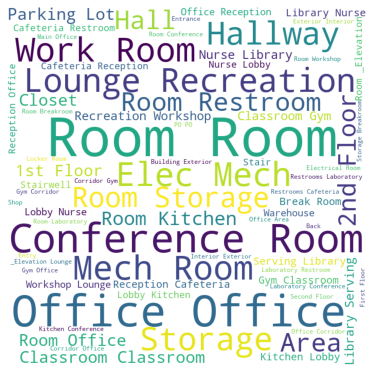

In [50]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt
# if uising a Jupyter notebook, include:
%matplotlib inline

all_words = '' 

#looping through all incidents and joining them to one text, to extract most common words
for arg in df['name']:
    tokens = arg.split()
    all_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700, 
                background_color ='white', 
                min_font_size = 10).generate(all_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [44]:
from collections import Counter
Counter(" ".join(df["notes"]).split()).most_common(10)

[('nan', 159590),
 ('switch', 947),
 ('notes', 920),
 ('general', 913),
 ('Occ', 807),
 ('in', 556),
 ('2', 480),
 ('are', 433),
 ('is', 406),
 ('to', 405)]

In [47]:
from collections import Counter
Counter(" ".join(df["name"]).split()).most_common(10)

[('Room', 21932),
 ('Office', 11892),
 ('Storage', 5465),
 ('Exterior', 4611),
 ('-', 4425),
 ('Floor', 4054),
 ('2', 3704),
 ('Restroom', 3651),
 ('1', 3448),
 ('Classroom', 3370)]

In [48]:
from collections import Counter
Counter(" ".join(df["description"]).split()).most_common(10)

[('nan', 155012),
 ('description', 916),
 ('-', 630),
 ('2', 622),
 ('OSW', 591),
 ('to', 547),
 ('and', 457),
 ('1', 443),
 ('is', 420),
 ('NOTE', 417)]

In [49]:
Counter(" ".join(df["name_with_parents"]).split()).most_common(10)

[('||', 177164),
 ('Floor', 28948),
 ('Room', 26583),
 ('Interior', 24732),
 ('Office', 19096),
 ('Faker::University', 18453),
 ('Building', 12752),
 ('-', 9783),
 ('1', 9234),
 ('2', 8567)]

In [53]:
ex_light = pd.read_csv('/content/existing_lightings.csv',  error_bad_lines=False) 

In [54]:
ex_light.head(5)

,id,name,description,company_id,project_id,existing_lighting_id,watts_per_product,lm70,created_at,updated_at,technology_id,product_type_id,category_id,subcategory_id,active,inactive_at,inactivated_by_user_id,ballast_id,shown,luminaire_category_id,luminaire_subcategory_id,base_type_id,lens_trim_id,mounting_type_id,product_length,ballast_factor,ballast_factor_name,ballast_loss_factor,power_factor,color_temp,custom_attributes,calc_ready,audit_complete,display_order,created_by_user_id,uuid,existing_product_type,luminaire_size_id,favorite_company_id,copied_from_id,code
0,6370,EC2x2B-4L-2'-F17T8-Total63W,"Egg Crate, 2x2 Box, 4 Lamp, 2', T8, Linear Flu...",NaN,NaN,NaN,63.0,20000,2018-08-08 00:13:51.885126,2019-03-02 03:17:43.014997,334.0,24.0,686.0,721.0,t,NaN,NaN,NaN,t,515.0,NaN,NaN,501.0,NaN,24.0,0.88,NaN,NaN,NaN,NaN,"{""lamp_base"": null, ""lamp_type"": ""T8 - Linear""...",NaN,NaN,NaN,NaN,NaN,1,764.0,NaN,NaN,NaN
1,6373,P2x2B-3L-2'-F17T8-Total48W,"Parabolic, 2x2 Box, 3 Lamp, 2', T8, Linear Flu...",NaN,NaN,NaN,48.0,20000,2018-08-08 00:13:52.37689,2019-03-02 03:17:43.08981,334.0,24.0,686.0,721.0,t,NaN,NaN,NaN,t,515.0,NaN,NaN,504.0,NaN,24.0,0.88,NaN,NaN,NaN,NaN,"{""lamp_base"": null, ""lamp_type"": ""T8 - Linear""...",NaN,NaN,NaN,NaN,NaN,1,764.0,NaN,NaN,NaN
2,6375,V2x2B-1L-2'-F17T8-Total16W,"Volumetric, 2x2 Box, 1 Lamp, 2', T8, Linear Fl...",NaN,NaN,NaN,16.0,20000,2018-08-08 00:13:52.802687,2019-03-02 03:17:43.13952,334.0,24.0,686.0,721.0,t,NaN,NaN,NaN,t,515.0,NaN,NaN,508.0,NaN,24.0,0.88,NaN,NaN,NaN,NaN,"{""lamp_base"": null, ""lamp_type"": ""T8 - Linear""...",NaN,NaN,NaN,NaN,NaN,1,764.0,NaN,NaN,NaN
3,6376,V2x2B-2L-2'-F17T8-Total32W,"Volumetric, 2x2 Box, 2 Lamp, 2', T8, Linear Fl...",NaN,NaN,NaN,32.0,20000,2018-08-08 00:13:52.946827,2019-03-02 03:17:43.164246,334.0,24.0,686.0,721.0,t,NaN,NaN,NaN,t,515.0,NaN,NaN,508.0,NaN,24.0,0.88,NaN,NaN,NaN,NaN,"{""lamp_base"": null, ""lamp_type"": ""T8 - Linear""...",NaN,NaN,NaN,NaN,NaN,1,764.0,NaN,NaN,NaN
4,6378,V2x2B-4L-2'-F17T8-Total63W,"Volumetric, 2x2 Box, 4 Lamp, 2', T8, Linear Fl...",NaN,NaN,NaN,63.0,20000,2018-08-08 00:13:53.261381,2019-03-02 03:17:43.214975,334.0,24.0,686.0,721.0,t,NaN,NaN,NaN,t,515.0,NaN,NaN,508.0,NaN,24.0,0.88,NaN,NaN,NaN,NaN,"{""lamp_base"": null, ""lamp_type"": ""T8 - Linear""...",NaN,NaN,NaN,NaN,NaN,1,764.0,NaN,NaN,NaN


In [55]:
print(ex_light.nunique())

id                          77546
name                        28547
description                  8400
company_id                    232
project_id                   7937
existing_lighting_id         5578
watts_per_product             643
lm70                           62
created_at                  77546
updated_at                  68506
technology_id                  18
product_type_id                 6
category_id                    99
subcategory_id                 59
active                          2
inactive_at                  2422
inactivated_by_user_id          0
ballast_id                     10
shown                           2
luminaire_category_id          30
luminaire_subcategory_id       13
base_type_id                    1
lens_trim_id                    6
mounting_type_id                0
product_length                 19
ballast_factor                 80
ballast_factor_name             0
ballast_loss_factor             0
power_factor                    1
color_temp    

In [59]:
new_light = ex_light["name"].str.split("-", n = 4, expand = True)

In [60]:
new_light.head()

,0,1,2,3,4
0,EC2x2B,4L,2',F17T8,Total63W
1,P2x2B,3L,2',F17T8,Total48W
2,V2x2B,1L,2',F17T8,Total16W
3,V2x2B,2L,2',F17T8,Total32W
4,V2x2B,4L,2',F17T8,Total63W


In [61]:
ex_light["name0"]= new_light[0]
  
# making separate last name column from new data frame
ex_light["name1"]= new_light[1]
ex_light["name2"]= new_light[2]
ex_light["name3"]= new_light[3]
ex_light["name4"]= new_light[4]  
# Dropping old Name columns
ex_light.drop(columns =["name"], inplace = True)

In [62]:
ex_light.head(5)

,id,description,company_id,project_id,existing_lighting_id,watts_per_product,lm70,created_at,updated_at,technology_id,product_type_id,category_id,subcategory_id,active,inactive_at,inactivated_by_user_id,ballast_id,shown,luminaire_category_id,luminaire_subcategory_id,base_type_id,lens_trim_id,mounting_type_id,product_length,ballast_factor,ballast_factor_name,ballast_loss_factor,power_factor,color_temp,custom_attributes,calc_ready,audit_complete,display_order,created_by_user_id,uuid,existing_product_type,luminaire_size_id,favorite_company_id,copied_from_id,code,name0,name1,name2,name3,name4
0,6370,"Egg Crate, 2x2 Box, 4 Lamp, 2', T8, Linear Flu...",NaN,NaN,NaN,63.0,20000,2018-08-08 00:13:51.885126,2019-03-02 03:17:43.014997,334.0,24.0,686.0,721.0,t,NaN,NaN,NaN,t,515.0,NaN,NaN,501.0,NaN,24.0,0.88,NaN,NaN,NaN,NaN,"{""lamp_base"": null, ""lamp_type"": ""T8 - Linear""...",NaN,NaN,NaN,NaN,NaN,1,764.0,NaN,NaN,NaN,EC2x2B,4L,2',F17T8,Total63W
1,6373,"Parabolic, 2x2 Box, 3 Lamp, 2', T8, Linear Flu...",NaN,NaN,NaN,48.0,20000,2018-08-08 00:13:52.37689,2019-03-02 03:17:43.08981,334.0,24.0,686.0,721.0,t,NaN,NaN,NaN,t,515.0,NaN,NaN,504.0,NaN,24.0,0.88,NaN,NaN,NaN,NaN,"{""lamp_base"": null, ""lamp_type"": ""T8 - Linear""...",NaN,NaN,NaN,NaN,NaN,1,764.0,NaN,NaN,NaN,P2x2B,3L,2',F17T8,Total48W
2,6375,"Volumetric, 2x2 Box, 1 Lamp, 2', T8, Linear Fl...",NaN,NaN,NaN,16.0,20000,2018-08-08 00:13:52.802687,2019-03-02 03:17:43.13952,334.0,24.0,686.0,721.0,t,NaN,NaN,NaN,t,515.0,NaN,NaN,508.0,NaN,24.0,0.88,NaN,NaN,NaN,NaN,"{""lamp_base"": null, ""lamp_type"": ""T8 - Linear""...",NaN,NaN,NaN,NaN,NaN,1,764.0,NaN,NaN,NaN,V2x2B,1L,2',F17T8,Total16W
3,6376,"Volumetric, 2x2 Box, 2 Lamp, 2', T8, Linear Fl...",NaN,NaN,NaN,32.0,20000,2018-08-08 00:13:52.946827,2019-03-02 03:17:43.164246,334.0,24.0,686.0,721.0,t,NaN,NaN,NaN,t,515.0,NaN,NaN,508.0,NaN,24.0,0.88,NaN,NaN,NaN,NaN,"{""lamp_base"": null, ""lamp_type"": ""T8 - Linear""...",NaN,NaN,NaN,NaN,NaN,1,764.0,NaN,NaN,NaN,V2x2B,2L,2',F17T8,Total32W
4,6378,"Volumetric, 2x2 Box, 4 Lamp, 2', T8, Linear Fl...",NaN,NaN,NaN,63.0,20000,2018-08-08 00:13:53.261381,2019-03-02 03:17:43.214975,334.0,24.0,686.0,721.0,t,NaN,NaN,NaN,t,515.0,NaN,NaN,508.0,NaN,24.0,0.88,NaN,NaN,NaN,NaN,"{""lamp_base"": null, ""lamp_type"": ""T8 - Linear""...",NaN,NaN,NaN,NaN,NaN,1,764.0,NaN,NaN,NaN,V2x2B,4L,2',F17T8,Total63W


In [63]:
print(ex_light.nunique())

id                          77546
description                  8400
company_id                    232
project_id                   7937
existing_lighting_id         5578
watts_per_product             643
lm70                           62
created_at                  77546
updated_at                  68506
technology_id                  18
product_type_id                 6
category_id                    99
subcategory_id                 59
active                          2
inactive_at                  2422
inactivated_by_user_id          0
ballast_id                     10
shown                           2
luminaire_category_id          30
luminaire_subcategory_id       13
base_type_id                    1
lens_trim_id                    6
mounting_type_id                0
product_length                 19
ballast_factor                 80
ballast_factor_name             0
ballast_loss_factor             0
power_factor                    1
color_temp                      0
custom_attribu

In [64]:
print(ex_light["description"][0])

Egg Crate, 2x2 Box, 4 Lamp, 2', T8, Linear Fluorescent, 17W Lamp, Standard Ballast, BF= 0.88, 20000 Hours, Luminaire, 63 Total Watts


In [65]:
new_light1 = ex_light["description"].str.split(",", n = 11, expand = True)

In [67]:
ex_light["description0"]= new_light1[0]
  
# making separate last name column from new data frame
ex_light["description1"]= new_light1[1]
ex_light["description2"]= new_light1[2]
ex_light["description3"]= new_light1[3]
ex_light["description4"]= new_light1[4]
ex_light["description5"]= new_light1[5] 
ex_light["description6"]= new_light1[6] 
ex_light["description7"]= new_light1[7]
ex_light["description8"]= new_light1[8]
ex_light["description9"]= new_light1[9]
ex_light["description10"]= new_light1[10]
ex_light["description11"]= new_light1[11]
#ex_light["description12"]= new_light1[12]
# Dropping old Name columns
ex_light.drop(columns =["description"], inplace = True)

In [68]:
ex_light.head(5)

,id,company_id,project_id,existing_lighting_id,watts_per_product,lm70,created_at,updated_at,technology_id,product_type_id,category_id,subcategory_id,active,inactive_at,inactivated_by_user_id,ballast_id,shown,luminaire_category_id,luminaire_subcategory_id,base_type_id,lens_trim_id,mounting_type_id,product_length,ballast_factor,ballast_factor_name,ballast_loss_factor,power_factor,color_temp,custom_attributes,calc_ready,audit_complete,display_order,created_by_user_id,uuid,existing_product_type,luminaire_size_id,favorite_company_id,copied_from_id,code,name0,name1,name2,name3,name4,description0,description1,description2,description3,description4,description5,description6,description7,description8,description9,description10,description11
0,6370,NaN,NaN,NaN,63.0,20000,2018-08-08 00:13:51.885126,2019-03-02 03:17:43.014997,334.0,24.0,686.0,721.0,t,NaN,NaN,NaN,t,515.0,NaN,NaN,501.0,NaN,24.0,0.88,NaN,NaN,NaN,NaN,"{""lamp_base"": null, ""lamp_type"": ""T8 - Linear""...",NaN,NaN,NaN,NaN,NaN,1,764.0,NaN,NaN,NaN,EC2x2B,4L,2',F17T8,Total63W,Egg Crate,2x2 Box,4 Lamp,2',T8,Linear Fluorescent,17W Lamp,Standard Ballast,BF= 0.88,20000 Hours,Luminaire,63 Total Watts
1,6373,NaN,NaN,NaN,48.0,20000,2018-08-08 00:13:52.37689,2019-03-02 03:17:43.08981,334.0,24.0,686.0,721.0,t,NaN,NaN,NaN,t,515.0,NaN,NaN,504.0,NaN,24.0,0.88,NaN,NaN,NaN,NaN,"{""lamp_base"": null, ""lamp_type"": ""T8 - Linear""...",NaN,NaN,NaN,NaN,NaN,1,764.0,NaN,NaN,NaN,P2x2B,3L,2',F17T8,Total48W,Parabolic,2x2 Box,3 Lamp,2',T8,Linear Fluorescent,17W Lamp,Standard Ballast,BF= 0.88,20000 Hours,Luminaire,48 Total Watts
2,6375,NaN,NaN,NaN,16.0,20000,2018-08-08 00:13:52.802687,2019-03-02 03:17:43.13952,334.0,24.0,686.0,721.0,t,NaN,NaN,NaN,t,515.0,NaN,NaN,508.0,NaN,24.0,0.88,NaN,NaN,NaN,NaN,"{""lamp_base"": null, ""lamp_type"": ""T8 - Linear""...",NaN,NaN,NaN,NaN,NaN,1,764.0,NaN,NaN,NaN,V2x2B,1L,2',F17T8,Total16W,Volumetric,2x2 Box,1 Lamp,2',T8,Linear Fluorescent,17W Lamp,Standard Ballast,BF= 0.88,20000 Hours,Luminaire,16 Total Watts
3,6376,NaN,NaN,NaN,32.0,20000,2018-08-08 00:13:52.946827,2019-03-02 03:17:43.164246,334.0,24.0,686.0,721.0,t,NaN,NaN,NaN,t,515.0,NaN,NaN,508.0,NaN,24.0,0.88,NaN,NaN,NaN,NaN,"{""lamp_base"": null, ""lamp_type"": ""T8 - Linear""...",NaN,NaN,NaN,NaN,NaN,1,764.0,NaN,NaN,NaN,V2x2B,2L,2',F17T8,Total32W,Volumetric,2x2 Box,2 Lamp,2',T8,Linear Fluorescent,17W Lamp,Standard Ballast,BF= 0.88,20000 Hours,Luminaire,32 Total Watts
4,6378,NaN,NaN,NaN,63.0,20000,2018-08-08 00:13:53.261381,2019-03-02 03:17:43.214975,334.0,24.0,686.0,721.0,t,NaN,NaN,NaN,t,515.0,NaN,NaN,508.0,NaN,24.0,0.88,NaN,NaN,NaN,NaN,"{""lamp_base"": null, ""lamp_type"": ""T8 - Linear""...",NaN,NaN,NaN,NaN,NaN,1,764.0,NaN,NaN,NaN,V2x2B,4L,2',F17T8,Total63W,Volumetric,2x2 Box,4 Lamp,2',T8,Linear Fluorescent,17W Lamp,Standard Ballast,BF= 0.88,20000 Hours,Luminaire,63 Total Watts


In [69]:
print(ex_light.nunique())

id                          77546
company_id                    232
project_id                   7937
existing_lighting_id         5578
watts_per_product             643
lm70                           62
created_at                  77546
updated_at                  68506
technology_id                  18
product_type_id                 6
category_id                    99
subcategory_id                 59
active                          2
inactive_at                  2422
inactivated_by_user_id          0
ballast_id                     10
shown                           2
luminaire_category_id          30
luminaire_subcategory_id       13
base_type_id                    1
lens_trim_id                    6
mounting_type_id                0
product_length                 19
ballast_factor                 80
ballast_factor_name             0
ballast_loss_factor             0
power_factor                    1
color_temp                      0
custom_attributes           65533
calc_ready    

In [71]:
ex_light.to_csv('/content/existing_lightings_split.csv')